# Anatomy of a DataFrame

## Learning Objectives

<div style="border: 1px solid black; padding: 10px; background-color: #EDEDED;">
    <ul>
        <li>Create a DataFrame from a list of lists.</li>
        <li>Create a DataFrame from a dictionary.</li>
        <li>Define a row index.</li>
        <li>Explain the parallels between Pandas' row and column indexes and cell addresses in Excel.</li>
        <li>Give an example of a situation where it might be useful to use data values as the index.</li>
        <li>Retrieve and set the value in an individual cell using the at and iat methods.</li>
        <li>Extract the column names using the column property of DataFrame.</li>
        <li>Set the column names using the column property of DataFrame.</li>
        <li>Extract the row index values using the index property of DataFrame.</li>
        <li>Set the row index using the index property of DataFrame.</li>
        <li>Get the dimensions of a DataFrame using the shape property of DataFrame.</li>
    </ul>
</div>

## Overview

In this chapter, we will view some simple DataFrames and learn about their indexes. Just like in Excel, where each cell has an "address", e.g. A1, B4, Pandas has row and column indexes. However, Pandas provides much more flexibility and power in choosing indexes. That, however, means you need to learn how these indexes work and how to use them to retrieve data.

## Creating a DataFrame from a List of Lists

Typically, you will load data from an Excel or CSV file into Pandas. However, it is possible to construct a DataFrame from existing lists or dictionaries. In this chapter, we will construct simple DataFrames so that we can focus on their indexes.

Let's begin by importing the necessary libraries. Run the cell below.

In [1]:
import numpy as np
import pandas as pd

Now, let's create a really simple DataFrame in which we list some companies, their stock ticker symbol, and their closing stock price on October 18, 2019. Run the following cell and then take a look at it to see if you can figure out how it works.

In [2]:
dfStocks = pd.DataFrame([['Walmart, Inc.' ,'WMT', 119.14], 
                         ['Target Corporation', 'TGT', 112.81], 
                         ['Best Buy Co., Inc.', 'BBY', 70.52]])
dfStocks

,0,1,2
0,"Walmart, Inc.",WMT,119.14
1,Target Corporation,TGT,112.81
2,"Best Buy Co., Inc.",BBY,70.52


In the above cell, we created a DataFrame from a list of lists (sort of like a matrix). Each sublist contains the company name, ticker symbol, and a stock price. Notice that Pandas converted each sublist into a row of the new DataFrame.

We used the function `pd.DataFrame`. This is a special function called a "constructor". It takes some input data, constructs a DataFrame object, and returns the DataFrame. We stored the return value in the variable `dfStocks`.

## Row and Column Indexes

### Default Index Labels

In the code above, we gave some data to the function `pd.DataFrame` and told it to construct a DataFrame. We did not give that function any information about the row and column names, so it assigned them automatically. Along each axis, it assigned the value 0 to the first item, then 1, then 2. You can think of these index values as addresses. There is one value located at each address. In our simple DataFrame, the addresses go from (0, 0), which has the value `'Walmart, Inc.'`, to (2, 2), which has the value `'70.52'`. Later, you will see how to use these indexes to retrieve and set values.

### Parallels to Excel

Notice the parallels to Excel. Excel numbers the rows 1, 2, ... and it labels the columns A, B, ... Each cell in Excel has a unique address, e.g. C8. Most data-oriented software will behave similarly and assign indexes to each cell in a table.

### Working with Column Indexes

Our sample DataFrame currently has 0, 1, and 2 as column labels. This isn't very useful, especially since we know that each column has specific information. We know that the first column contains company names, the second column contains tickers, and the third column contains stock prices. Can we assign custom labels so that our data is more meaningfully displayed? Of course we can!

If you already have a DataFrame and want to change the column names, there are two ways:
1. Pass a list to the columns property of DataFrame.
2. Use the `rename` method of DataFrame.

Let's discuss each of these in turn. Before we do, let's retrieve the current columns of our DataFrame.

#### Retrieving the Columns of a DataFrame

To get or set the current column labels, use the `columns` property of DataFrame, e.g.

In [3]:
dfStocks.columns

RangeIndex(start=0, stop=3, step=1)

The output of the above code tells us that Pandas assigned a `RangeIndex`. This is like the `range` function you learned about when we learned about `for` loops. The above output tells us that the column labels start at 0 and go to 2 in steps of 1. Just like with the `range` function, the last value is one less than the stop parameter.

Often, it's just easier to work with a list. If we want the columns as a list, we can do it one of two ways:

In [4]:
dfStocks.columns.tolist()

[0, 1, 2]

In [5]:
list(dfStocks.columns)

[0, 1, 2]

#### Setting the Columns of a DataFrame Using a List

This is easy. All you need to do is set the columns equal to a list. See below.

In [6]:
dfStocks.columns = ['Company Name', 'Ticker', 'Closing Price']
dfStocks

,Company Name,Ticker,Closing Price
0,"Walmart, Inc.",WMT,119.14
1,Target Corporation,TGT,112.81
2,"Best Buy Co., Inc.",BBY,70.52


See how easy that was? :) And now our DataFrame has meaningful column names. 

Column names can be numbers, dates, or strings. I typically see strings as column names, but there's no right or wrong way. It really depends on your data.

What changed under the hood? Let's take a look at the `columns` property of our DataFrame once again:

In [7]:
dfStocks.columns

Index(['Company Name', 'Ticker', 'Closing Price'], dtype='object')

So now, instead of a `RangeIndex`, our columns are an `Index` that consists of strings.

#### Setting the Columns of a DataFrame Using the `rename` method

You won't always want to change all column names. And if your DataFrame has hundreds of column names, there should be an easier way to change the name of one or two columns without passing a list containing all the column names. Pandas provides the `rename` method for this purpose. To use `rename` to change specific columns, you will use the `columns` keyword argument. The argument should be a dictionary containing the old and new names.

Let's illustrate with an example. Say I want to change the column name **Ticker** to **TICKER**. Say that I also want to change **Closing Price** to **Price**. I would call the rename function as follows:

In [8]:
dfStocks = dfStocks.rename(columns = {'Ticker' : 'TICKER',
                                      'Closing Price' : 'Price'})
dfStocks

,Company Name,TICKER,Price
0,"Walmart, Inc.",WMT,119.14
1,Target Corporation,TGT,112.81
2,"Best Buy Co., Inc.",BBY,70.52


Let's take a look at that code. We passed it a dictionary. In the dictionary, each key was an existing column name. Each value was a new column name. The `rename` method looked through the columns for a column named `'Ticker'`. When it found one, it replaced it with `'TICKER'`. It did the same for `'Closing Price'`.

Notice also that I had to assign the return value of the `rename` method to dfStocks. That's because, by default, the `rename` method create a whole new DataFrame! If I just call the rename method and do not assign its return value to anything, the new DataFrame will not be saved anywhere.

If you want the `rename` method to rename the columns of a DataFrame, and not create a new DataFrame, you can set the optional keyword argument `inplace` to True. See the code below:

In [9]:
dfStocks.rename(columns={'Company Name': 'Name'}, inplace=True)
dfStocks

,Name,TICKER,Price
0,"Walmart, Inc.",WMT,119.14
1,Target Corporation,TGT,112.81
2,"Best Buy Co., Inc.",BBY,70.52


In summary, the argument `inplace=True` tells the `rename` method to modify the existing DataFrame and not create a new one.

### Working with Row Indexes

You can retrieve the existing row indexes with the `index` property of DataFrame. For example, see below:

In [10]:
dfStocks.index

RangeIndex(start=0, stop=3, step=1)

In [11]:
dfStocks.index.tolist()

[0, 1, 2]

You can also set the row indexes by passing a list, just like we did with the columns. It is not as common to set row indexes as it is to set column indexes. Usually, it is done with time series data. We'll show you a quick example of that, just to show you how it looks, but we won't focus on custom row indexes in this class.

Let's say I have closing stock prices for Altria Group (NYSE: MO). Since I will have one price per day, and I want to look up prices by date, I might want to use the dates as my row indexes. Here's how that would look. Don't worry if this code isn't clear; we're not going to hold you responsible for it.

In [12]:
dates = ["10/14/2019","10/15/2019","10/16/2019","10/17/2019","10/18/2019"]
prices = [42.52,42.75,43.45,43.9,44.28]

dfMO = pd.DataFrame(data=prices, 
                    columns=['Closing Price'],
                    index=pd.to_datetime(dates))
dfMO

,Closing Price
2019-10-14,42.52
2019-10-15,42.75
2019-10-16,43.45
2019-10-17,43.90
2019-10-18,44.28


Look at the resulting DataFrame. The row indexes are dates. Who cares, you ask? Well if we want to plot the price over time, and we want to see the date on the x-axis, it's very easy if the dates are the index. For example:

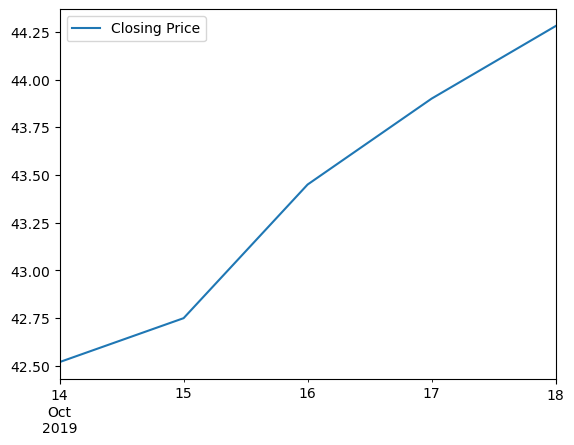

In [14]:
plt = dfMO.plot()

## Creating a DataFrame from a Dictionary

Sometimes, you already have your data in list form. Often, you will have one list per column. When that is the case, it is easy to create a DataFrame from a dictionary. Let's recreate the sample DataFrame from above using a dictionary.

In [15]:
dfStocks = pd.DataFrame({'Company Name': ['Walmart, Inc.', 'Target Corporation', 'Best Buy Co., Inc.'],
                         'Ticker': ['WMT', 'TGT', 'BBY'],
                         'Closing Price': [119.14, 112.81, 70.52]
                        })
dfStocks

,Company Name,Ticker,Closing Price
0,"Walmart, Inc.",WMT,119.14
1,Target Corporation,TGT,112.81
2,"Best Buy Co., Inc.",BBY,70.52


The above code constructed a dictionary. Each key was a column name, and each value was a list containing the data for a column. This is a common and simple way to construct a DataFrame. It has the advantage of allowing you to conveniently specify the column names. Notice that, as before, the row indexes were assigned automatically using a zero-based index.

## Retrieving and Setting Individual Values (Cells) in a DataFrame

Pandas provides two methods for accessing ("getting") and setting individual values in a DataFrame. These are the `at` and `iat` methods.

### The `at` Method

#### Retrieving a Single Value with the `at` method

The `at` method accesses a single value. It requires you to specify the row and column index of the value you want. Here are some examples:

In [16]:
dfStocks.at[0, 'Ticker']

'WMT'

In [17]:
dfStocks.at[1, 'Closing Price']

112.81

In [18]:
dfStocks.at[2, 'Company Name']

'Best Buy Co., Inc.'

Notice that the `at` method takes square brackets, not parentheses. That's because it is using indexing, just like you did with lists. Also notice that the first argument is a row  label, and the second argument is a column label. Also notice that the data type has to be correct. The row indexes are integers, so I have to provide an integer.

To illustrate this point, let's recreate our stocks DataFrame, this time without column labels:

In [19]:
dfStocks = pd.DataFrame([['Walmart, Inc.' ,'WMT', 119.14], 
                         ['Target Corporation', 'TGT', 112.81], 
                         ['Best Buy Co., Inc.', 'BBY', 70.52]])
dfStocks

,0,1,2
0,"Walmart, Inc.",WMT,119.14
1,Target Corporation,TGT,112.81
2,"Best Buy Co., Inc.",BBY,70.52


In this DataFrame, the column labels are integers (because they were automatically assigned). Therefore, I need to pass integers to the `at` method.

In [20]:
dfStocks.at[1, 1]

'TGT'

If I try to pass a column name as a string, I will get an error. For example, in the following code, there's no column labeled `'1'`, so I will get an error.

In [21]:
dfStocks.at[1, '1']

KeyError: '1'

#### Setting a Single Value with the `at` method

To set a value, simply use an equals statement to assign the value. For example:

In [22]:
dfStocks = pd.DataFrame({'Company Name': ['Walmart, Inc.', 'Target Corporation', 'Best Buy Co., Inc.'],
                         'Ticker': ['WMT', 'TGT', 'BBY'],
                         'Closing Price': [119.14, 112.81, 70.52]
                        })
dfStocks

,Company Name,Ticker,Closing Price
0,"Walmart, Inc.",WMT,119.14
1,Target Corporation,TGT,112.81
2,"Best Buy Co., Inc.",BBY,70.52


In [23]:
dfStocks.at[0, 'Company Name'] = 'WAL-MART'
dfStocks

,Company Name,Ticker,Closing Price
0,WAL-MART,WMT,119.14
1,Target Corporation,TGT,112.81
2,"Best Buy Co., Inc.",BBY,70.52


### The `iat` Method

The `iat` method performs "integer-based lookups". It accesses a single value for a row/column pair _by integer position_. It ignores any custom indexes you have created and simply counts the rows and columns. For example, if I want to access the first row, third column, I will go to position \[0, 2\]. That's because 0 is the integer index of the first row (remember, everything starts at zero), and 2 is the integer index of the third column.

Here are some examples of getting and setting:

In [24]:
dfStocks = pd.DataFrame({'Company Name': ['Walmart, Inc.', 'Target Corporation', 'Best Buy Co., Inc.'],
                         'Ticker': ['WMT', 'TGT', 'BBY'],
                         'Closing Price': [119.14, 112.81, 70.52]
                        })
dfStocks

,Company Name,Ticker,Closing Price
0,"Walmart, Inc.",WMT,119.14
1,Target Corporation,TGT,112.81
2,"Best Buy Co., Inc.",BBY,70.52


In [25]:
dfStocks.iat[1, 2]

112.81

In [26]:
dfStocks.iat[0, 0]

'Walmart, Inc.'

In [27]:
dfStocks.iat[2, 2]

70.52

To set a value using `iat`, simply assign with an equals sign. For example:

In [28]:
dfStocks.iat[2, 2] = -9999
dfStocks

,Company Name,Ticker,Closing Price
0,"Walmart, Inc.",WMT,119.14
1,Target Corporation,TGT,112.81
2,"Best Buy Co., Inc.",BBY,-9999.00


## Getting the Dimensions of a DataFrame

Use the `shape` method to get the dimensions (number of rows and number of columns) of your DataFrame. The `shape` method will return a _tuple_. Here's an example:

In [29]:
df = pd.DataFrame({'Col1': [1,2,3,4,5,6], 'Col2': list('abcdef'), 'Col3': list(range(100,700,100))})
df

,Col1,Col2,Col3
0,1,a,100
1,2,b,200
2,3,c,300
3,4,d,400
4,5,e,500
5,6,f,600


Let's get the dimensions of our new DataFrame:

In [30]:
df.shape

(6, 3)

We got the tuple `(6, 3)` indicating that there are 6 rows and 3 columns. Remember that you can retrieve values from a tuple just like you did from a list. See below:

In [31]:
print(f'The DataFrame df has {df.shape[0]} rows and {df.shape[1]} columns.')

The DataFrame df has 6 rows and 3 columns.
